In [2]:
import os
import pandas as pd
df = pd.read_csv(os.path.join('data','commit.csv'))
pr_df = pd.read_csv(os.path.join('pr_raw_data.csv'))
issue_df = pd.read_csv(os.path.join('data','issue.csv'))
files_df = pd.read_csv(os.path.join('data', 'files.csv'))
language_df = pd.read_csv(os.path.join('data', 'languages.csv'))

In [3]:
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
start = datetime.datetime(2022,2,3)
end = datetime.datetime(2024, 6, 10)

In [4]:
df['Updated at'] = pd.to_datetime(df['Updated at'])
commit_counts = df.groupby(df['Updated at'].dt.date).size()
commit_counts = commit_counts.reset_index(name = 'Commit count')

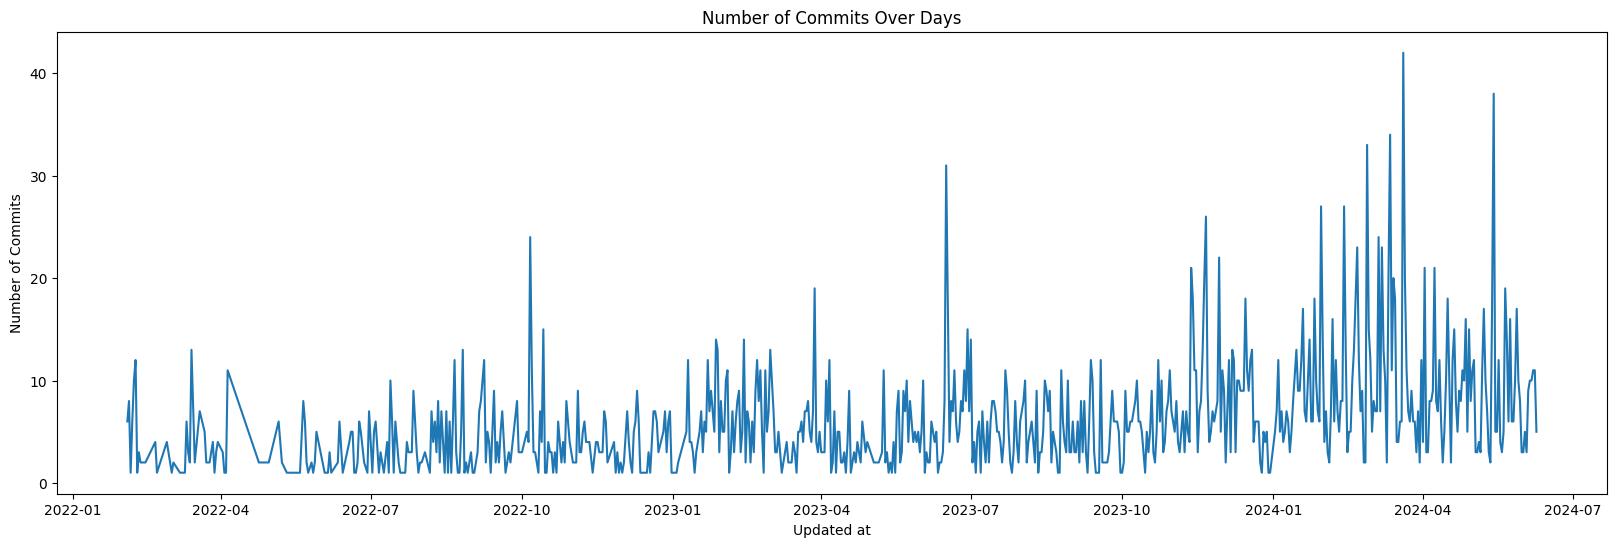

In [5]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=commit_counts, x='Updated at', y='Commit count')
plt.title("Number of Commits Over Days")
plt.xlabel('Updated at')
plt.ylabel("Number of Commits")
plt.show()

In [6]:
commit_counts = df.groupby(df['Updated at'].dt.date).size().reset_index(name='Commit count')
commit_counts['Updated at'] = pd.to_datetime(commit_counts['Updated at'])
commit_counts.set_index('Updated at', inplace=True)
weekly_commits = commit_counts.resample('W').sum()
monthly_commits = commit_counts.resample('M').sum()
yearly_commits = commit_counts.resample('A').sum()

/tmp/ipykernel_21878/3587167547.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_commits = commit_counts.resample('M').sum()
/tmp/ipykernel_21878/3587167547.py:6: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_commits = commit_counts.resample('A').sum()


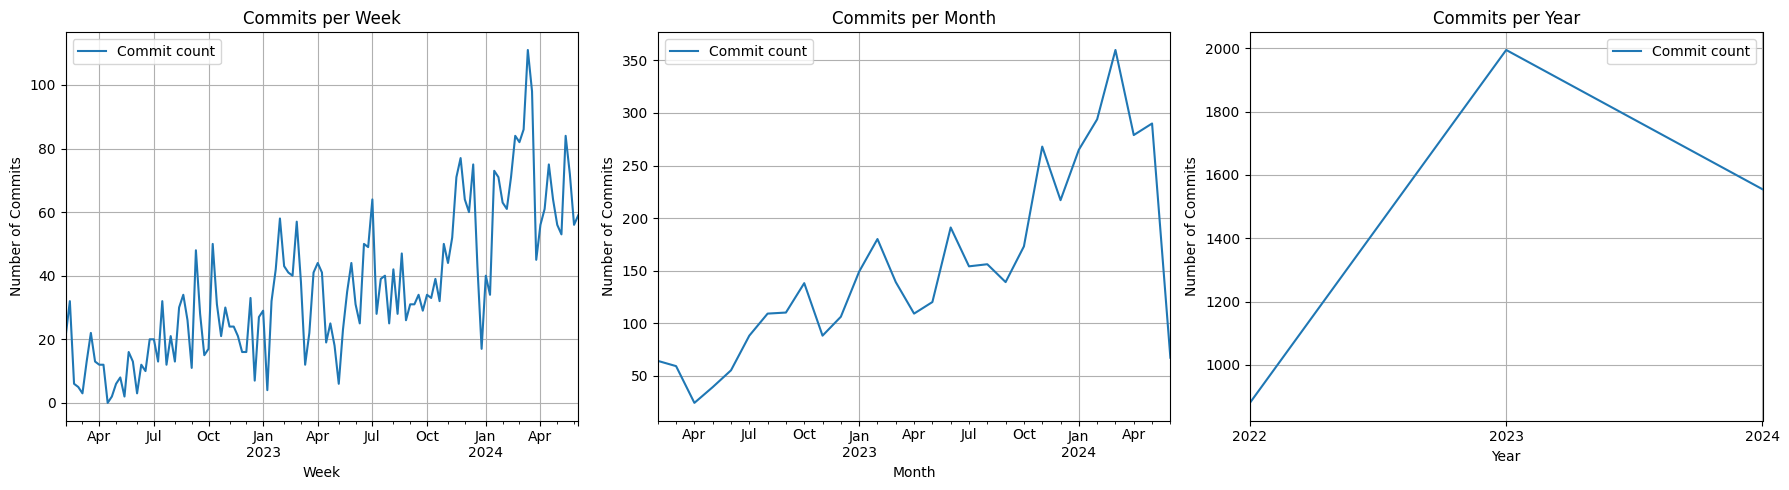

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  
weekly_commits.plot(ax=axes[0])
axes[0].set_title('Commits per Week')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Number of Commits')
axes[0].grid(True)
monthly_commits.plot(ax=axes[1])
axes[1].set_title('Commits per Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Commits')
axes[1].grid(True)
yearly_commits.plot(ax=axes[2])
axes[2].set_title('Commits per Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of Commits')
axes[2].grid(True)
plt.tight_layout()  
plt.show()


In [8]:
sns.set_palette('pastel')

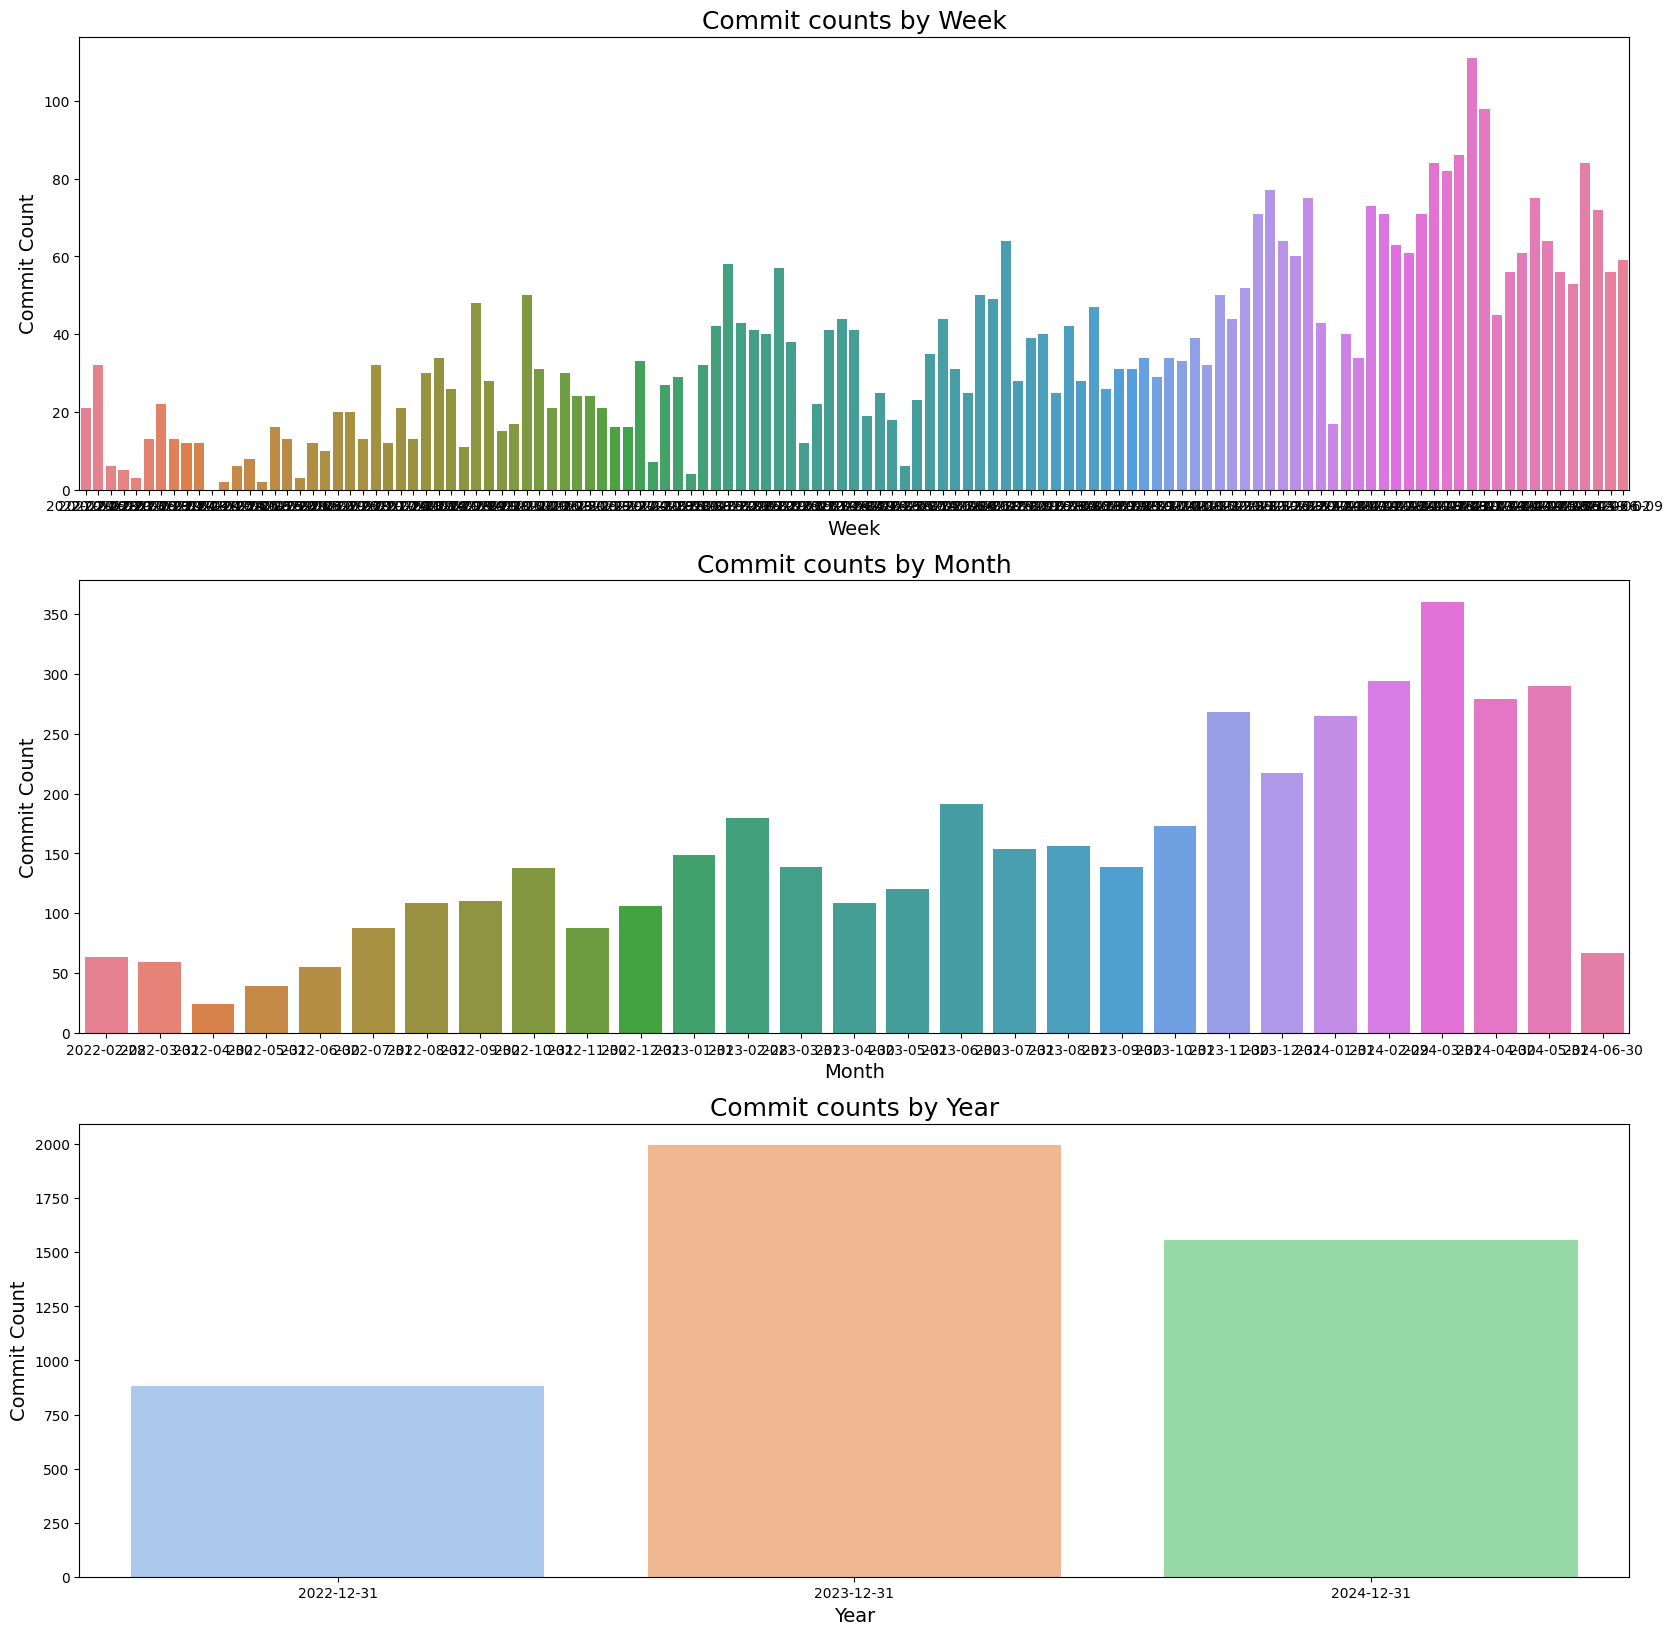

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
sns.barplot(data = weekly_commits,x=weekly_commits.index,y='Commit count', ax=axes[0], hue='Updated at')
axes[0].set_xlabel('Week',fontsize = 14)
axes[0].set_ylabel('Commit Count', fontsize = 14)
axes[0].set_title('Commit counts by Week', fontsize = 18)
sns.barplot(data = monthly_commits,x=monthly_commits.index,y='Commit count', ax=axes[1], hue = 'Updated at')
axes[1].set_xlabel('Month',fontsize = 14)
axes[1].set_ylabel('Commit Count', fontsize = 14)
axes[1].set_title('Commit counts by Month', fontsize = 18)
sns.barplot(data = yearly_commits,x=yearly_commits.index,y='Commit count', ax=axes[2], hue = 'Updated at')
axes[2].set_xlabel('Year', fontsize = 14)
axes[2].set_ylabel('Commit Count',fontsize = 14)
axes[2].set_title('Commit counts by Year', fontsize = 18)
plt.show()

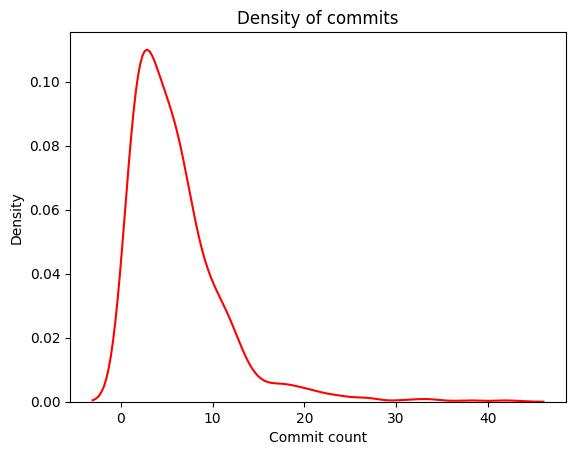

In [10]:
sns.kdeplot(data = commit_counts['Commit count'], color = 'red')
plt.title("Density of commits")
plt.show()

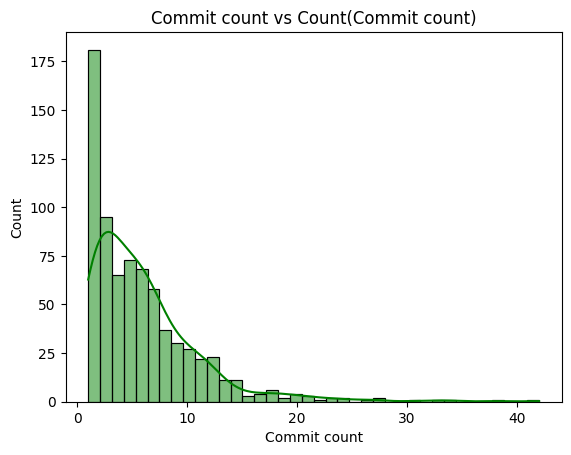

In [11]:
sns.histplot(commit_counts['Commit count'], color = 'green', kde=True)
plt.title("Commit count vs Count(Commit count)")
plt.show()

/tmp/ipykernel_21878/1170732898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Contributor', order=df['Contributor'].value_counts().head(20).index, palette=colors)


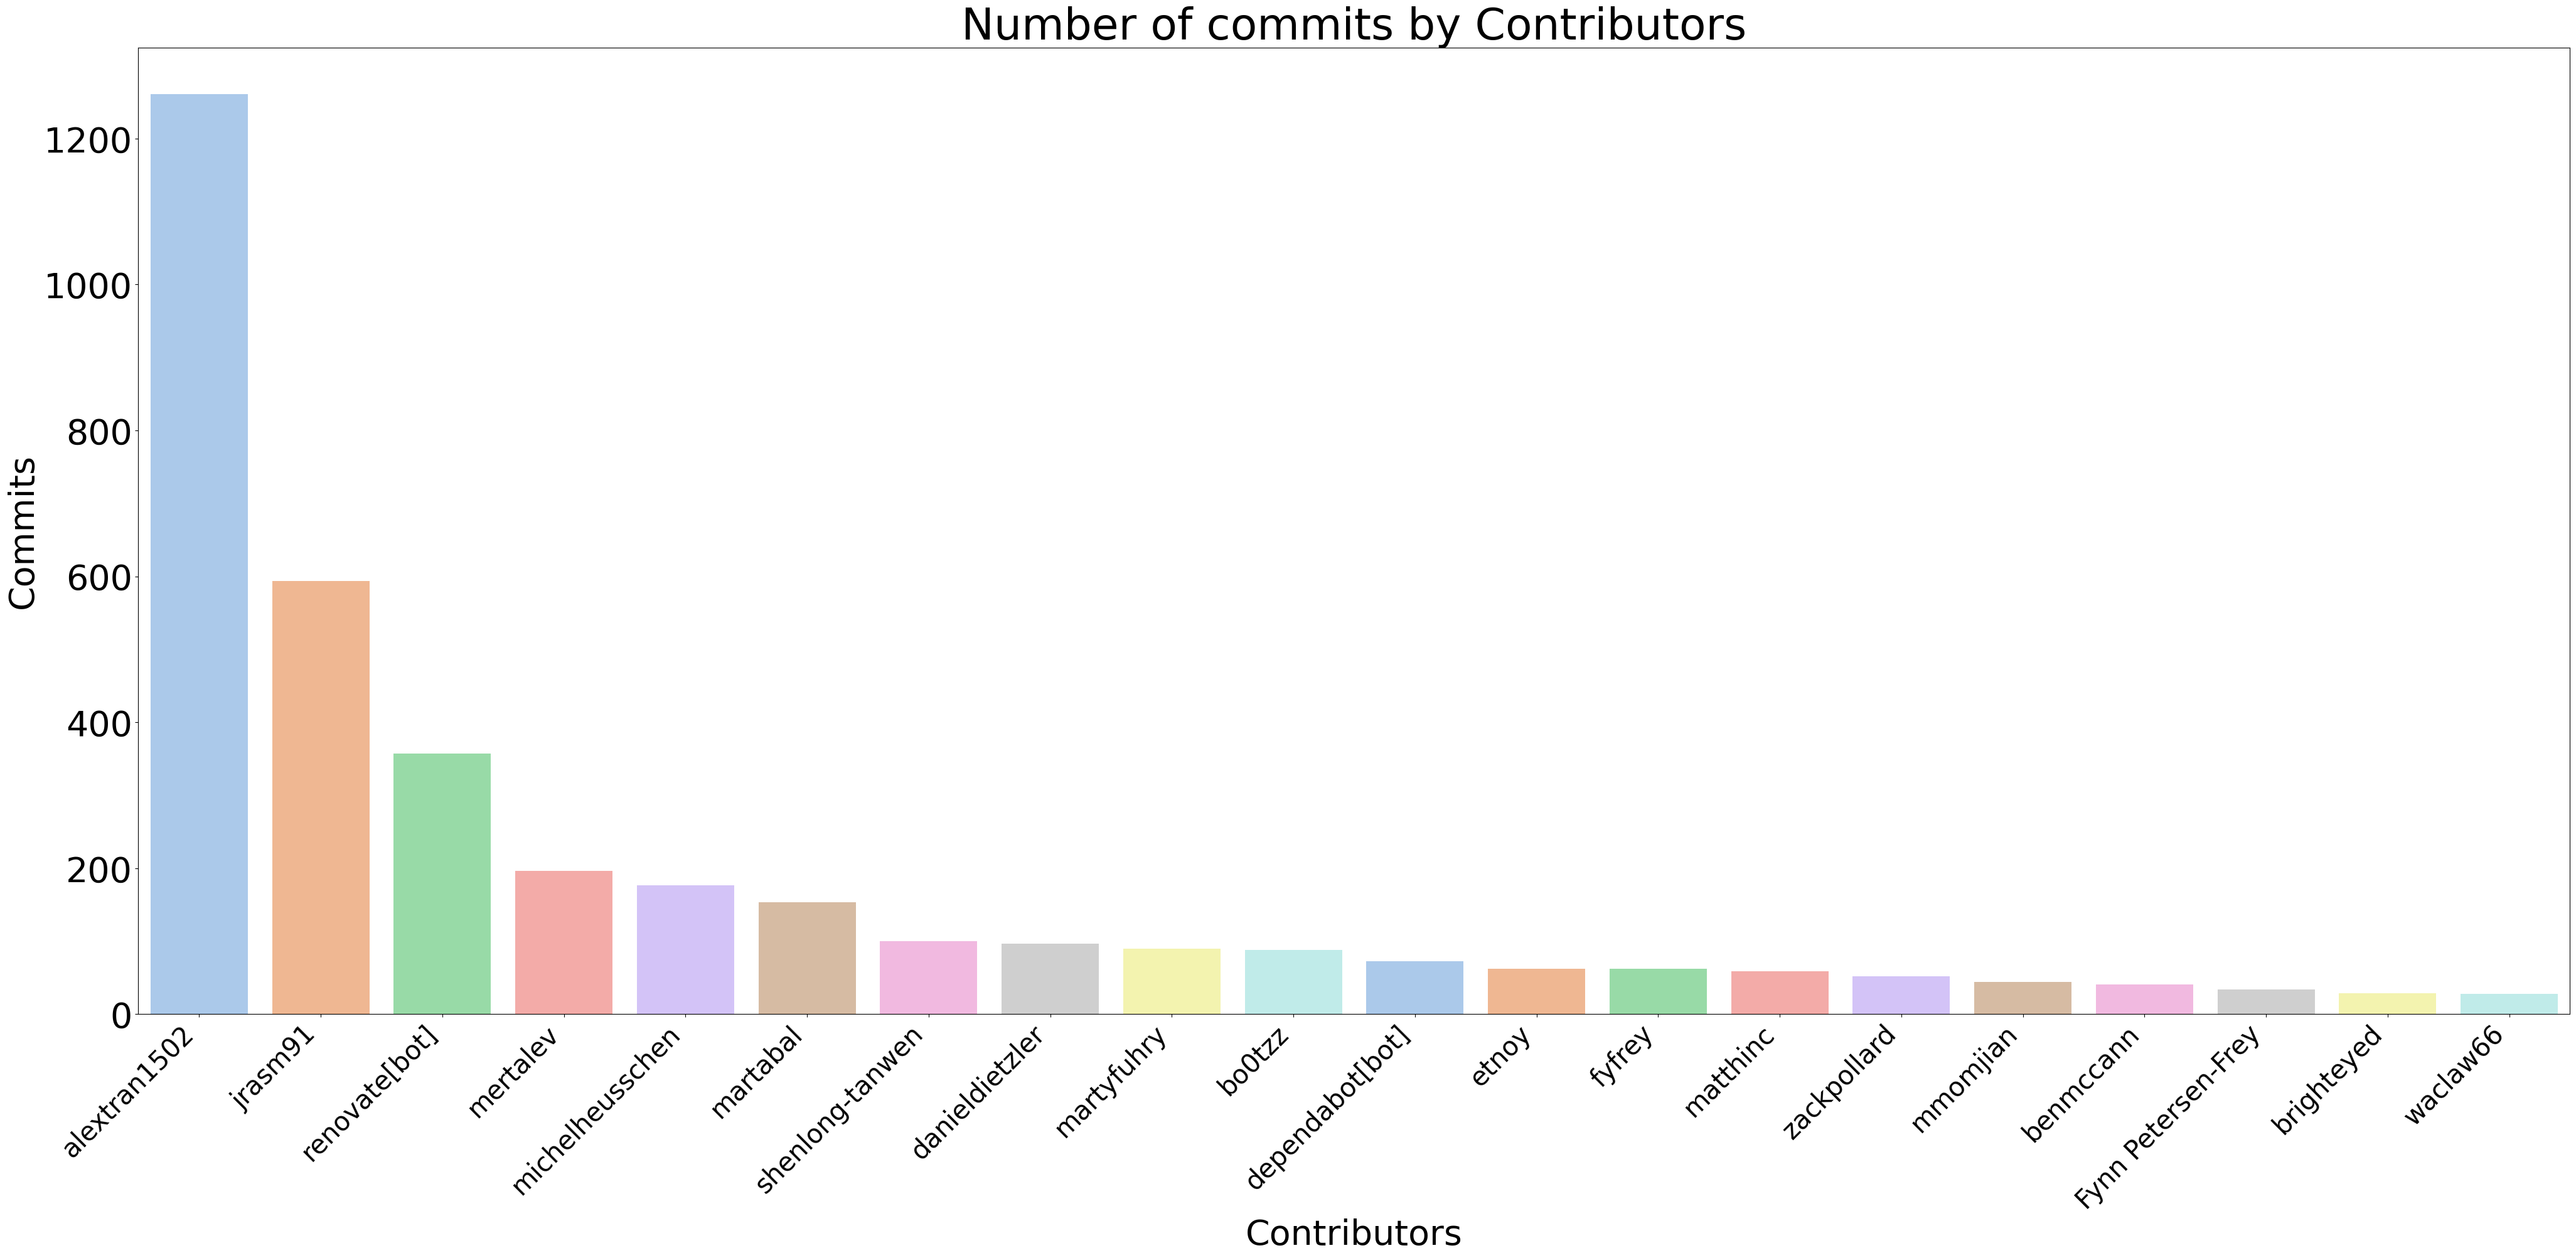

In [12]:
plt.figure(figsize=(50, 20))
colors = sns.color_palette("pastel", len(df['Contributor'].value_counts().head(20))) 
sns.countplot(data=df, x='Contributor', order=df['Contributor'].value_counts().head(20).index, palette=colors)
plt.xticks(rotation=45, ha='right', fontsize=30) 
plt.yticks(fontsize=40) 
plt.xlabel('Contributors', fontsize=40)
plt.ylabel('Commits', fontsize=40) 
plt.title('Number of commits by Contributors', fontsize = 50)
plt.show()

In [13]:
df['Updated at'] = pd.to_datetime(df['Updated at'])
time_activity = df.groupby('Contributor')['Updated at'].agg(['min', 'max'])
commit_contrib = df['Contributor'].value_counts()
commit_contrib.reset_index('Contributor')
time_activity = pd.merge(time_activity, commit_contrib, on="Contributor", how="inner")
time_activity = time_activity.reset_index('Contributor')

In [14]:
df_temp = pd.DataFrame()
df_temp['Contributor'] = time_activity['Contributor']
df_temp['Date'] = time_activity['min'].dt.date
df_temp = df_temp.reset_index(drop = True)
df_temp = df_temp.value_counts('Date', ascending=True)
df_temp = pd.DataFrame(df_temp)
df_temp = df_temp.rename(columns = {'count':'Number of contributor'})
df_temp = df_temp.reset_index('Date')
df_temp['Month'] = pd.to_datetime(df_temp['Date']).dt.strftime('%m-%Y')
df_temp['Year']= pd.to_datetime(df_temp['Date']).dt.strftime('%Y')


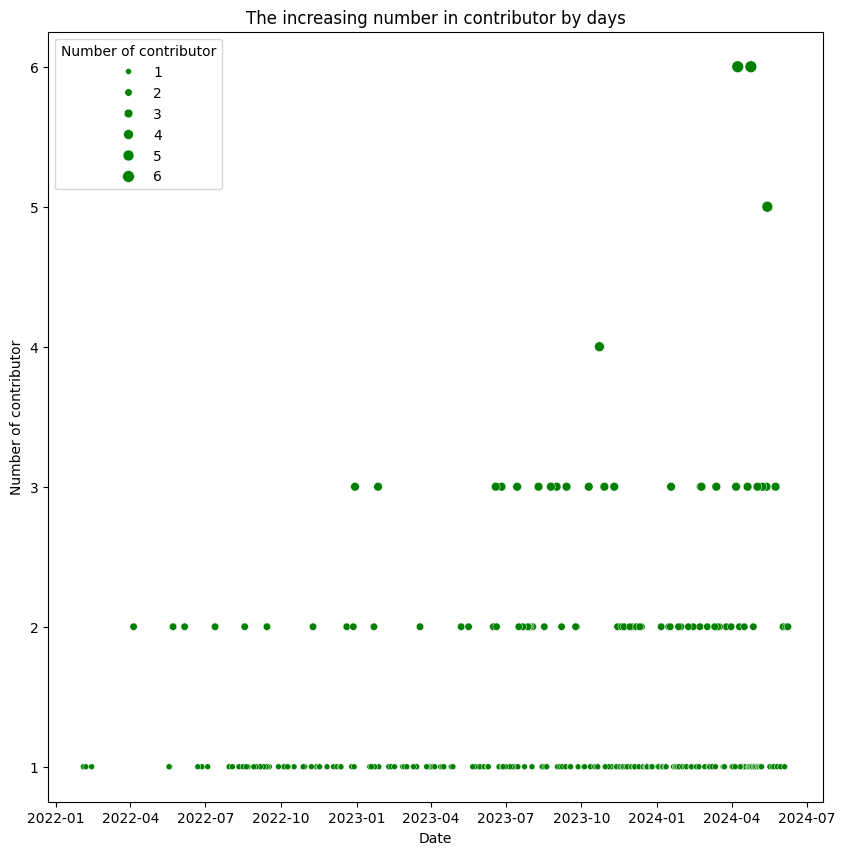

In [15]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data=df_temp, x = 'Date', y = 'Number of contributor', color = 'g', size = 'Number of contributor')
plt.title('The increasing number in contributor by days')
plt.show()

Text(0.5, 1.0, 'The increasing number in contributor by month')

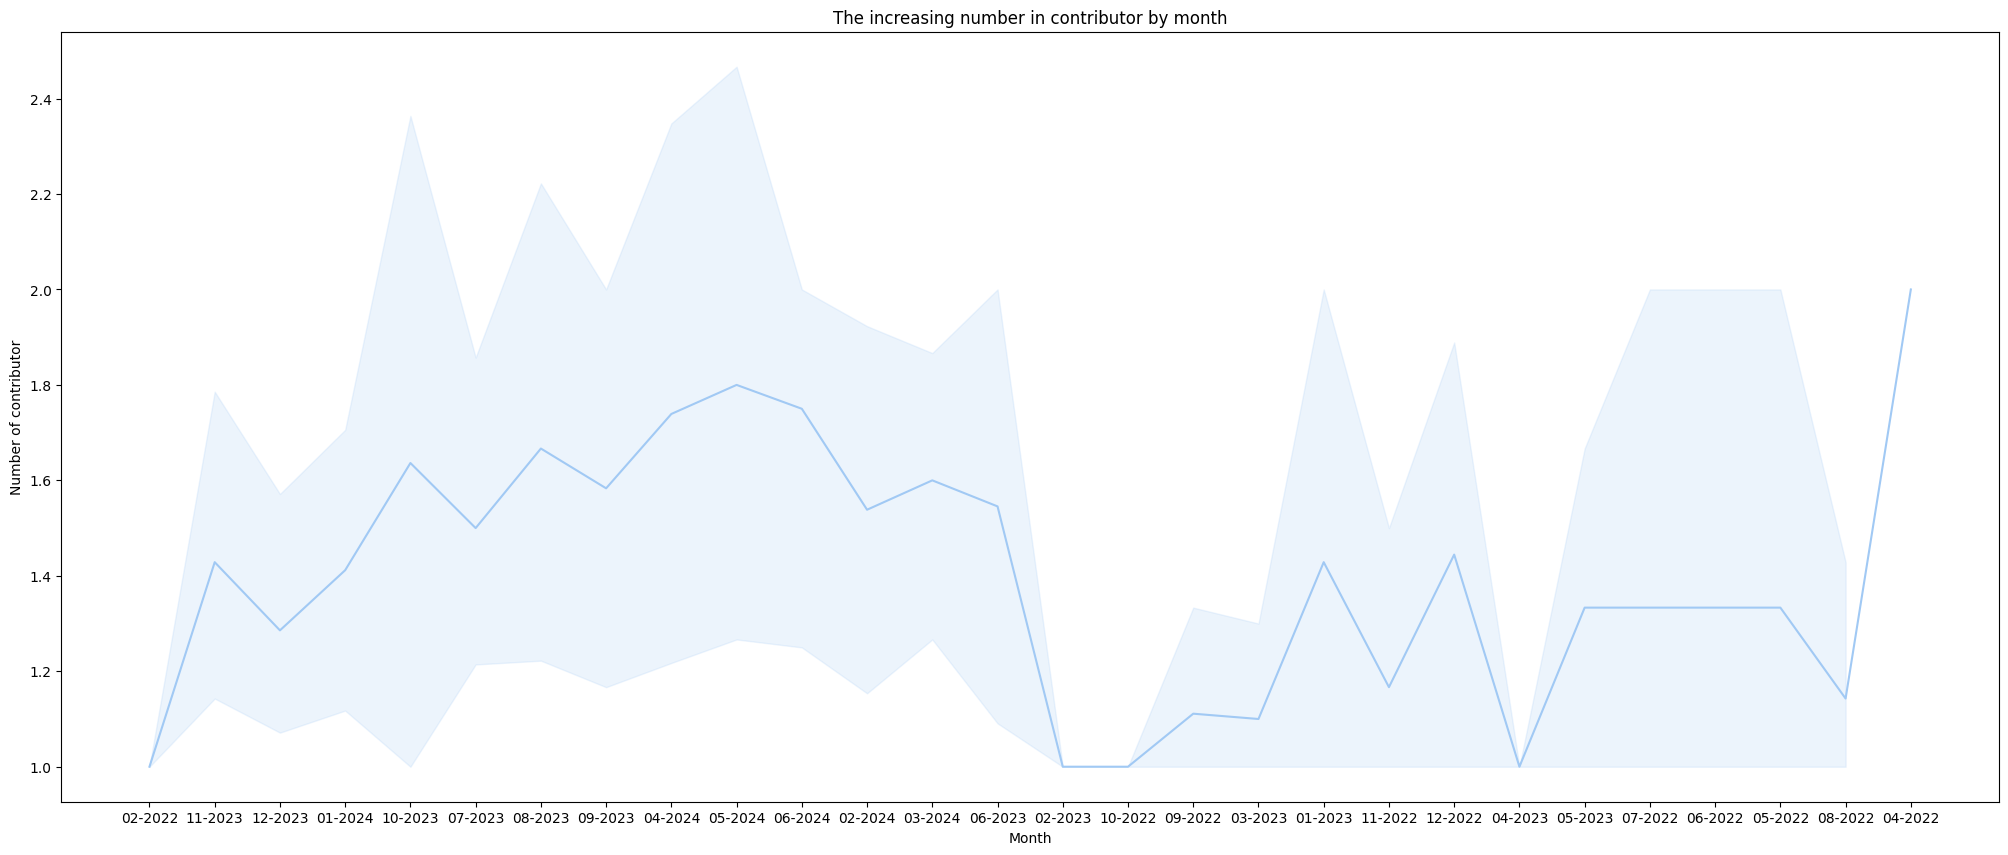

In [16]:
plt.figure(figsize = (25, 10))
sns.lineplot(data = df_temp, x = 'Month', y = 'Number of contributor')
plt.title('The increasing number in contributor by month')

In [17]:
df_commit_contrib = pd.read_csv(os.path.join('df_commit_contrib.csv'))

In [18]:
df_commit_contrib

Date  Commit count  Number of contributor    Month  Year
0    2022-02-03             6                      1  02-2022  2022
1    2022-02-06            21                    160  02-2022  2022
2    2022-02-13            53                    158  02-2022  2022
3    2022-04-05           139                    195  04-2022  2022
4    2022-05-18           158                    157  05-2022  2022
..          ...           ...                    ...      ...   ...
254  2024-05-30          4360                     71  05-2024  2024
255  2024-06-02          4371                    187  06-2024  2024
256  2024-06-04          4383                     72  06-2024  2024
257  2024-06-06          4403                    231  06-2024  2024
258  2024-06-08          4425                    281  06-2024  2024

[259 rows x 5 columns]

Text(0.5, 1.05, 'Number of contributor and commit by year')

<Figure size 1000x1000 with 0 Axes>

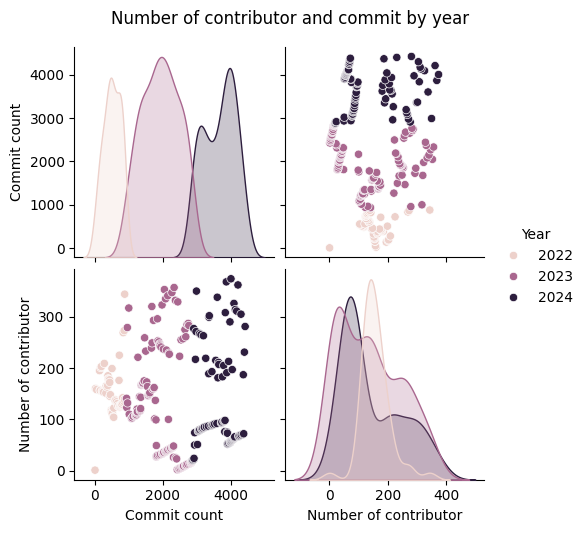

In [19]:
plt.figure(figsize = (10, 10))
sns.pairplot(data = df_commit_contrib, hue = 'Year')
plt.suptitle('Number of contributor and commit by year', y=1.05)

Text(0.5, 1.0, 'Number of contributor over years')

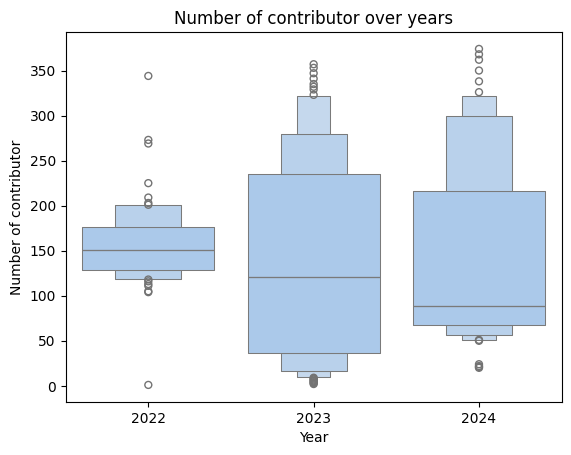

In [20]:
sns.boxenplot(data = df_commit_contrib, x='Year', y ='Number of contributor')
plt.title('Number of contributor over years')

Text(0.5, 1.0, 'Number of commit over years')

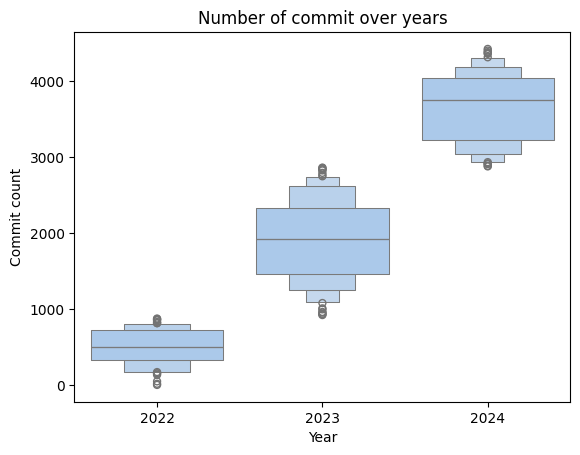

In [21]:
sns.boxenplot(data = df_commit_contrib, x='Year', y ='Commit count')
plt.title('Number of commit over years')

In [22]:
commit_count = pd.DataFrame()
commit_count['Commit count'] = df['Contributor'].value_counts().head(10)
commit_count = commit_count.reset_index(names = 'Contributor')
total_commits = commit_count['Commit count'].sum()
others_commits = df.shape[0] - total_commits
new_row = pd.DataFrame({'Contributor': 'others', 
                        'Commit count': [others_commits],
                        })
commit_count = pd.concat([commit_count, new_row], ignore_index=True)

In [23]:
sns.set_palette('pastel')

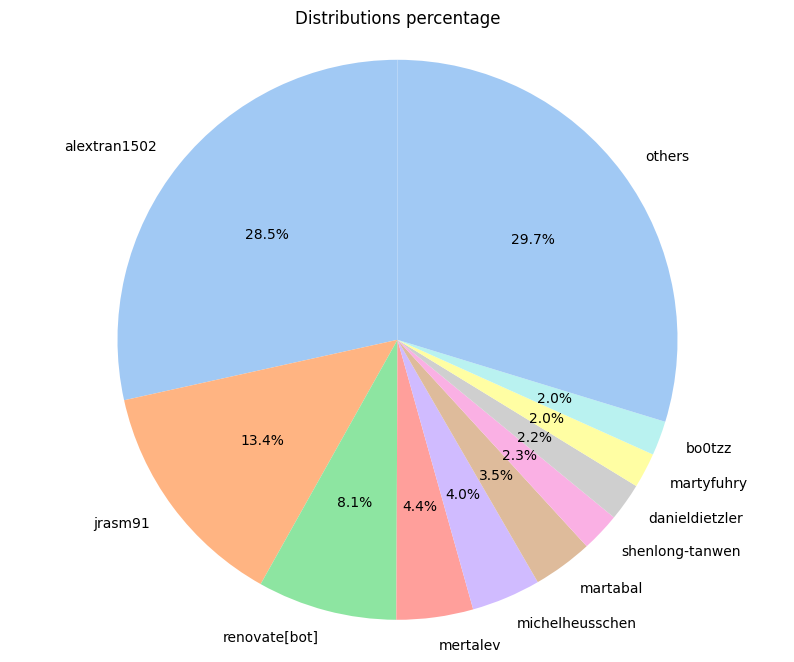

In [24]:
fig, ax = plt.subplots(figsize =(10, 8))
ax.pie(commit_count['Commit count'], labels = commit_count['Contributor'], autopct = '%1.1f%%', startangle = 90)
ax.axis('equal')
ax.set_title('Distributions percentage')
plt.show()

Số lượng pull request và commit

In [25]:
pr_df['Date'] = pd.to_datetime(pr_df['Updated_at']).dt.strftime('%d-%m-%Y')
df_temp['Commit count'] = pr_df['Commits']

In [26]:
result = pr_df.groupby('Date').agg(
    pull_request_count = ('Updated_at', 'size'),
    total_commit_count = ('Commits', 'sum')
)

In [47]:
result.sort_values('total_commit_count', ascending=False)

pull_request_count  total_commit_count
Date                                              
21-01-2023                   6                 672
19-12-2023                  14                 410
11-06-2024                  30                 258
07-06-2024                  13                 186
14-02-2024                  37                 183
...                        ...                 ...
18-10-2022                   1                   1
18-05-2022                   1                   1
16-03-2022                   1                   1
15-09-2022                   1                   1
31-12-2022                   1                   1

[713 rows x 2 columns]

Text(0.5, 1.05, 'Commit count and pull request')

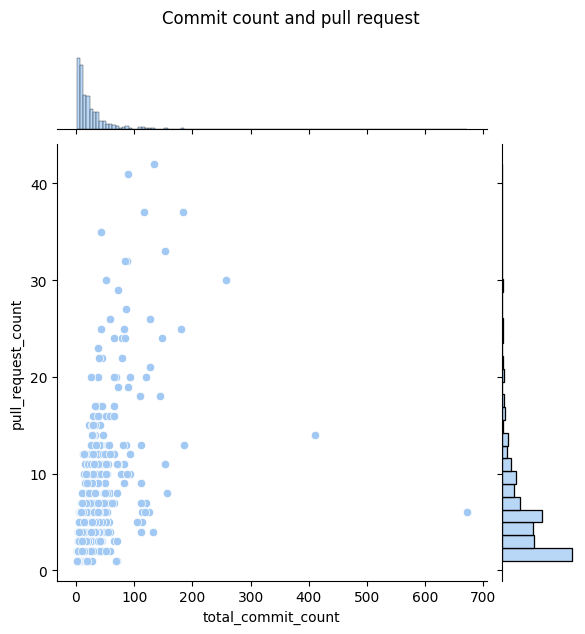

In [29]:
sns.jointplot(data = result, y= 'pull_request_count',x = 'total_commit_count')
plt.suptitle('Commit count and pull request', y = 1.05)

In [30]:
total_lines = language_df['lines'].sum()
language_df['percentage(%)'] = language_df['lines']*100/total_lines

In [31]:
df_temp = language_df[language_df['percentage(%)'] > 2]
others_pc = 100-df_temp['percentage(%)'].sum()
other_lines = total_lines - df_temp['lines'].sum()
new_row = pd.DataFrame({'language':'Others',
                        'lines': [other_lines],
                        'percentage(%)':[others_pc]})
df_temp = pd.concat([df_temp, new_row], ignore_index=True)

In [32]:
sns.set_palette(sns.color_palette("pastel"))


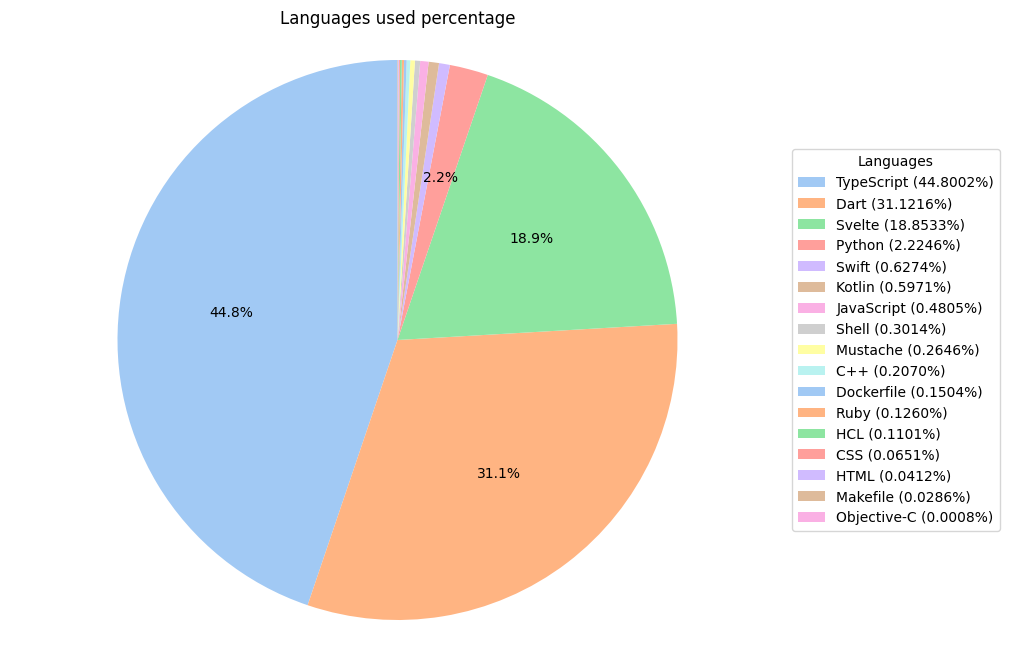

In [33]:

fig, ax = plt.subplots(figsize =(10, 8))
wedges, texts, autotexts = ax.pie(language_df['lines'], autopct=lambda p: '{:.1f}%'.format(p) if p > 2 else '',startangle = 90)
ax.axis('equal')
ax.set_title('Languages used percentage')
legend_labels = [ '{} ({:.4f}%)'.format(lang, 100 * val / sum(language_df['lines'])) for lang, val in zip(language_df['language'], language_df['lines'])]
ax.legend(wedges, legend_labels, title="Languages", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [69]:
pr_df

Author         Reviewer Pr_state                 Created_at  \
0     richard-salam                      open  2024-06-13 13:31:14+00:00   
1          waclaw66  michelheusschen     open  2024-06-13 12:48:13+00:00   
2       zackpollard          jrasm91   closed  2024-06-13 12:38:18+00:00   
3      alextran1502          jrasm91     open  2024-06-13 12:33:47+00:00   
4       zackpollard           bo0tzz   closed  2024-06-13 11:13:55+00:00   
...             ...              ...      ...                        ...   
4413   alextran1502                    closed  2022-02-08 17:24:07+00:00   
4414   alextran1502                    closed  2022-02-08 05:42:11+00:00   
4415   alextran1502                    closed  2022-02-07 02:28:28+00:00   
4416        schklom                    closed  2022-02-06 18:08:06+00:00   
4417   alextran1502                    closed  2022-02-06 06:07:43+00:00   

                     Updated_at  Additions  Commits                  Merged_at  
0     2024-06-13 13:31:29+00:00          8        1                        NaN  
1     2024-06-13 13:41:07+00:00        102        1                        NaN  
2     2024-06-13 12:44:07+00:00          0        1  2024-06-13 12:44:06+00:00  
3     2024-06-13 13:18:29+00:00         36        4                        NaN  
4     2024-06-13 11:37:43+00:00          7        2  2024-06-13 11:37:15+00:00  
...                         ...        ...      ...                        ...  
4413  2024-03-12 15:28:50+00:00        343        2  2022-02-08 17:24:49+00:00  
4414  2024-02-13 22:15:20+00:00      10715        2  2022-02-08 05:42:35+00:00  
4415  2024-03-09 23:22:33+00:00        133        3  2022-02-07 02:31:32+00:00  
4416  2024-03-09 04:16:39+00:00         53        2  2022-02-06 19:06:01+00:00  
4417  2024-05-29 17:11:53+00:00        581       14  2022-02-06 06:07:56+00:00  

[4418 rows x 8 columns]

In [81]:
df_temp = pr_df.groupby('Author').size()
df_temp = df_temp.reset_index(name =  'Prs')
df_temp = df_temp.sort_values('Prs', ascending=False)

In [82]:
df_temp = df_temp.head(10)

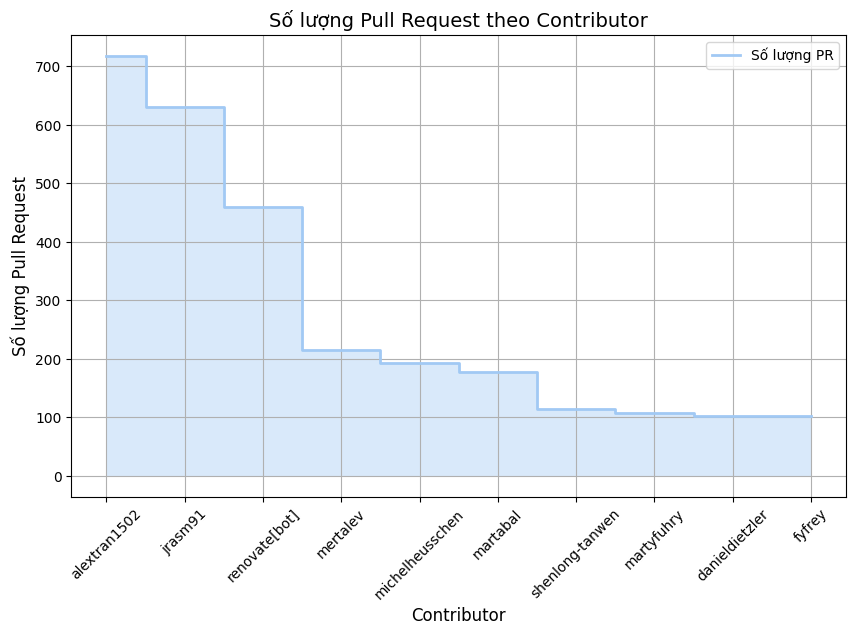

In [83]:
plt.figure(figsize=(10, 6))
plt.step(df_temp['Author'], df_temp['Prs'], where='mid', label='Số lượng PR', linewidth=2)
plt.fill_between(df_temp['Author'], df_temp['Prs'], step='mid', alpha=0.4)
plt.title('Số lượng Pull Request theo Contributor', fontsize=14)
plt.xlabel('Contributor', fontsize=12)
plt.ylabel('Số lượng Pull Request', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [85]:
pr_df = pr_df.sort_values('Created_at', ascending=True)

In [ ]:
df_temp = pd.DataFrame()
df_temp = pr_df.value_count

In [34]:
file_df = pd.read_csv(os.path.join('data','file_data.csv'))

In [35]:
import networkx as nx

In [36]:
pr_df = pd.read_csv(os.path.join('pr_raw_data.csv'))

In [37]:
import re
pr_fix = []
i = 0
for reviewers in pr_df['Reviewer']:
    if reviewers == '[]':
        reviewers =''
    else:
        reviewers =re.search(r'login="([^"]+)"', reviewers).group(1)
    pr_df['Reviewer'].loc[i]=reviewers
    i+=1
pr_df

/tmp/ipykernel_21878/2620306063.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pr_df['Reviewer'].loc[i]=reviewers
/tmp/ipykernel_21878/2620306063.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Author         Reviewer Pr_state                 Created_at  \
0     richard-salam                      open  2024-06-13 13:31:14+00:00   
1          waclaw66  michelheusschen     open  2024-06-13 12:48:13+00:00   
2       zackpollard          jrasm91   closed  2024-06-13 12:38:18+00:00   
3      alextran1502          jrasm91     open  2024-06-13 12:33:47+00:00   
4       zackpollard           bo0tzz   closed  2024-06-13 11:13:55+00:00   
...             ...              ...      ...                        ...   
4413   alextran1502                    closed  2022-02-08 17:24:07+00:00   
4414   alextran1502                    closed  2022-02-08 05:42:11+00:00   
4415   alextran1502                    closed  2022-02-07 02:28:28+00:00   
4416        schklom                    closed  2022-02-06 18:08:06+00:00   
4417   alextran1502                    closed  2022-02-06 06:07:43+00:00   

                     Updated_at  Additions  Commits                  Merged_at  
0     2024-06-13 13:31:29+00:00          8        1                        NaN  
1     2024-06-13 13:41:07+00:00        102        1                        NaN  
2     2024-06-13 12:44:07+00:00          0        1  2024-06-13 12:44:06+00:00  
3     2024-06-13 13:18:29+00:00         36        4                        NaN  
4     2024-06-13 11:37:43+00:00          7        2  2024-06-13 11:37:15+00:00  
...                         ...        ...      ...                        ...  
4413  2024-03-12 15:28:50+00:00        343        2  2022-02-08 17:24:49+00:00  
4414  2024-02-13 22:15:20+00:00      10715        2  2022-02-08 05:42:35+00:00  
4415  2024-03-09 23:22:33+00:00        133        3  2022-02-07 02:31:32+00:00  
4416  2024-03-09 04:16:39+00:00         53        2  2022-02-06 19:06:01+00:00  
4417  2024-05-29 17:11:53+00:00        581       14  2022-02-06 06:07:56+00:00  

[4418 rows x 8 columns]

In [38]:
G = nx.Graph()
df_temp = pd.DataFrame()
df_temp['Author'] = pr_df['Author'].copy()
df_temp['Reviewer'] = pr_df['Reviewer'].copy()

In [39]:
for i in range(df_temp.shape[0]-1):
    if df_temp['Reviewer'].loc[i] !='':
        G.add_edge(df_temp['Author'].loc[i],df_temp['Reviewer'].loc[i])

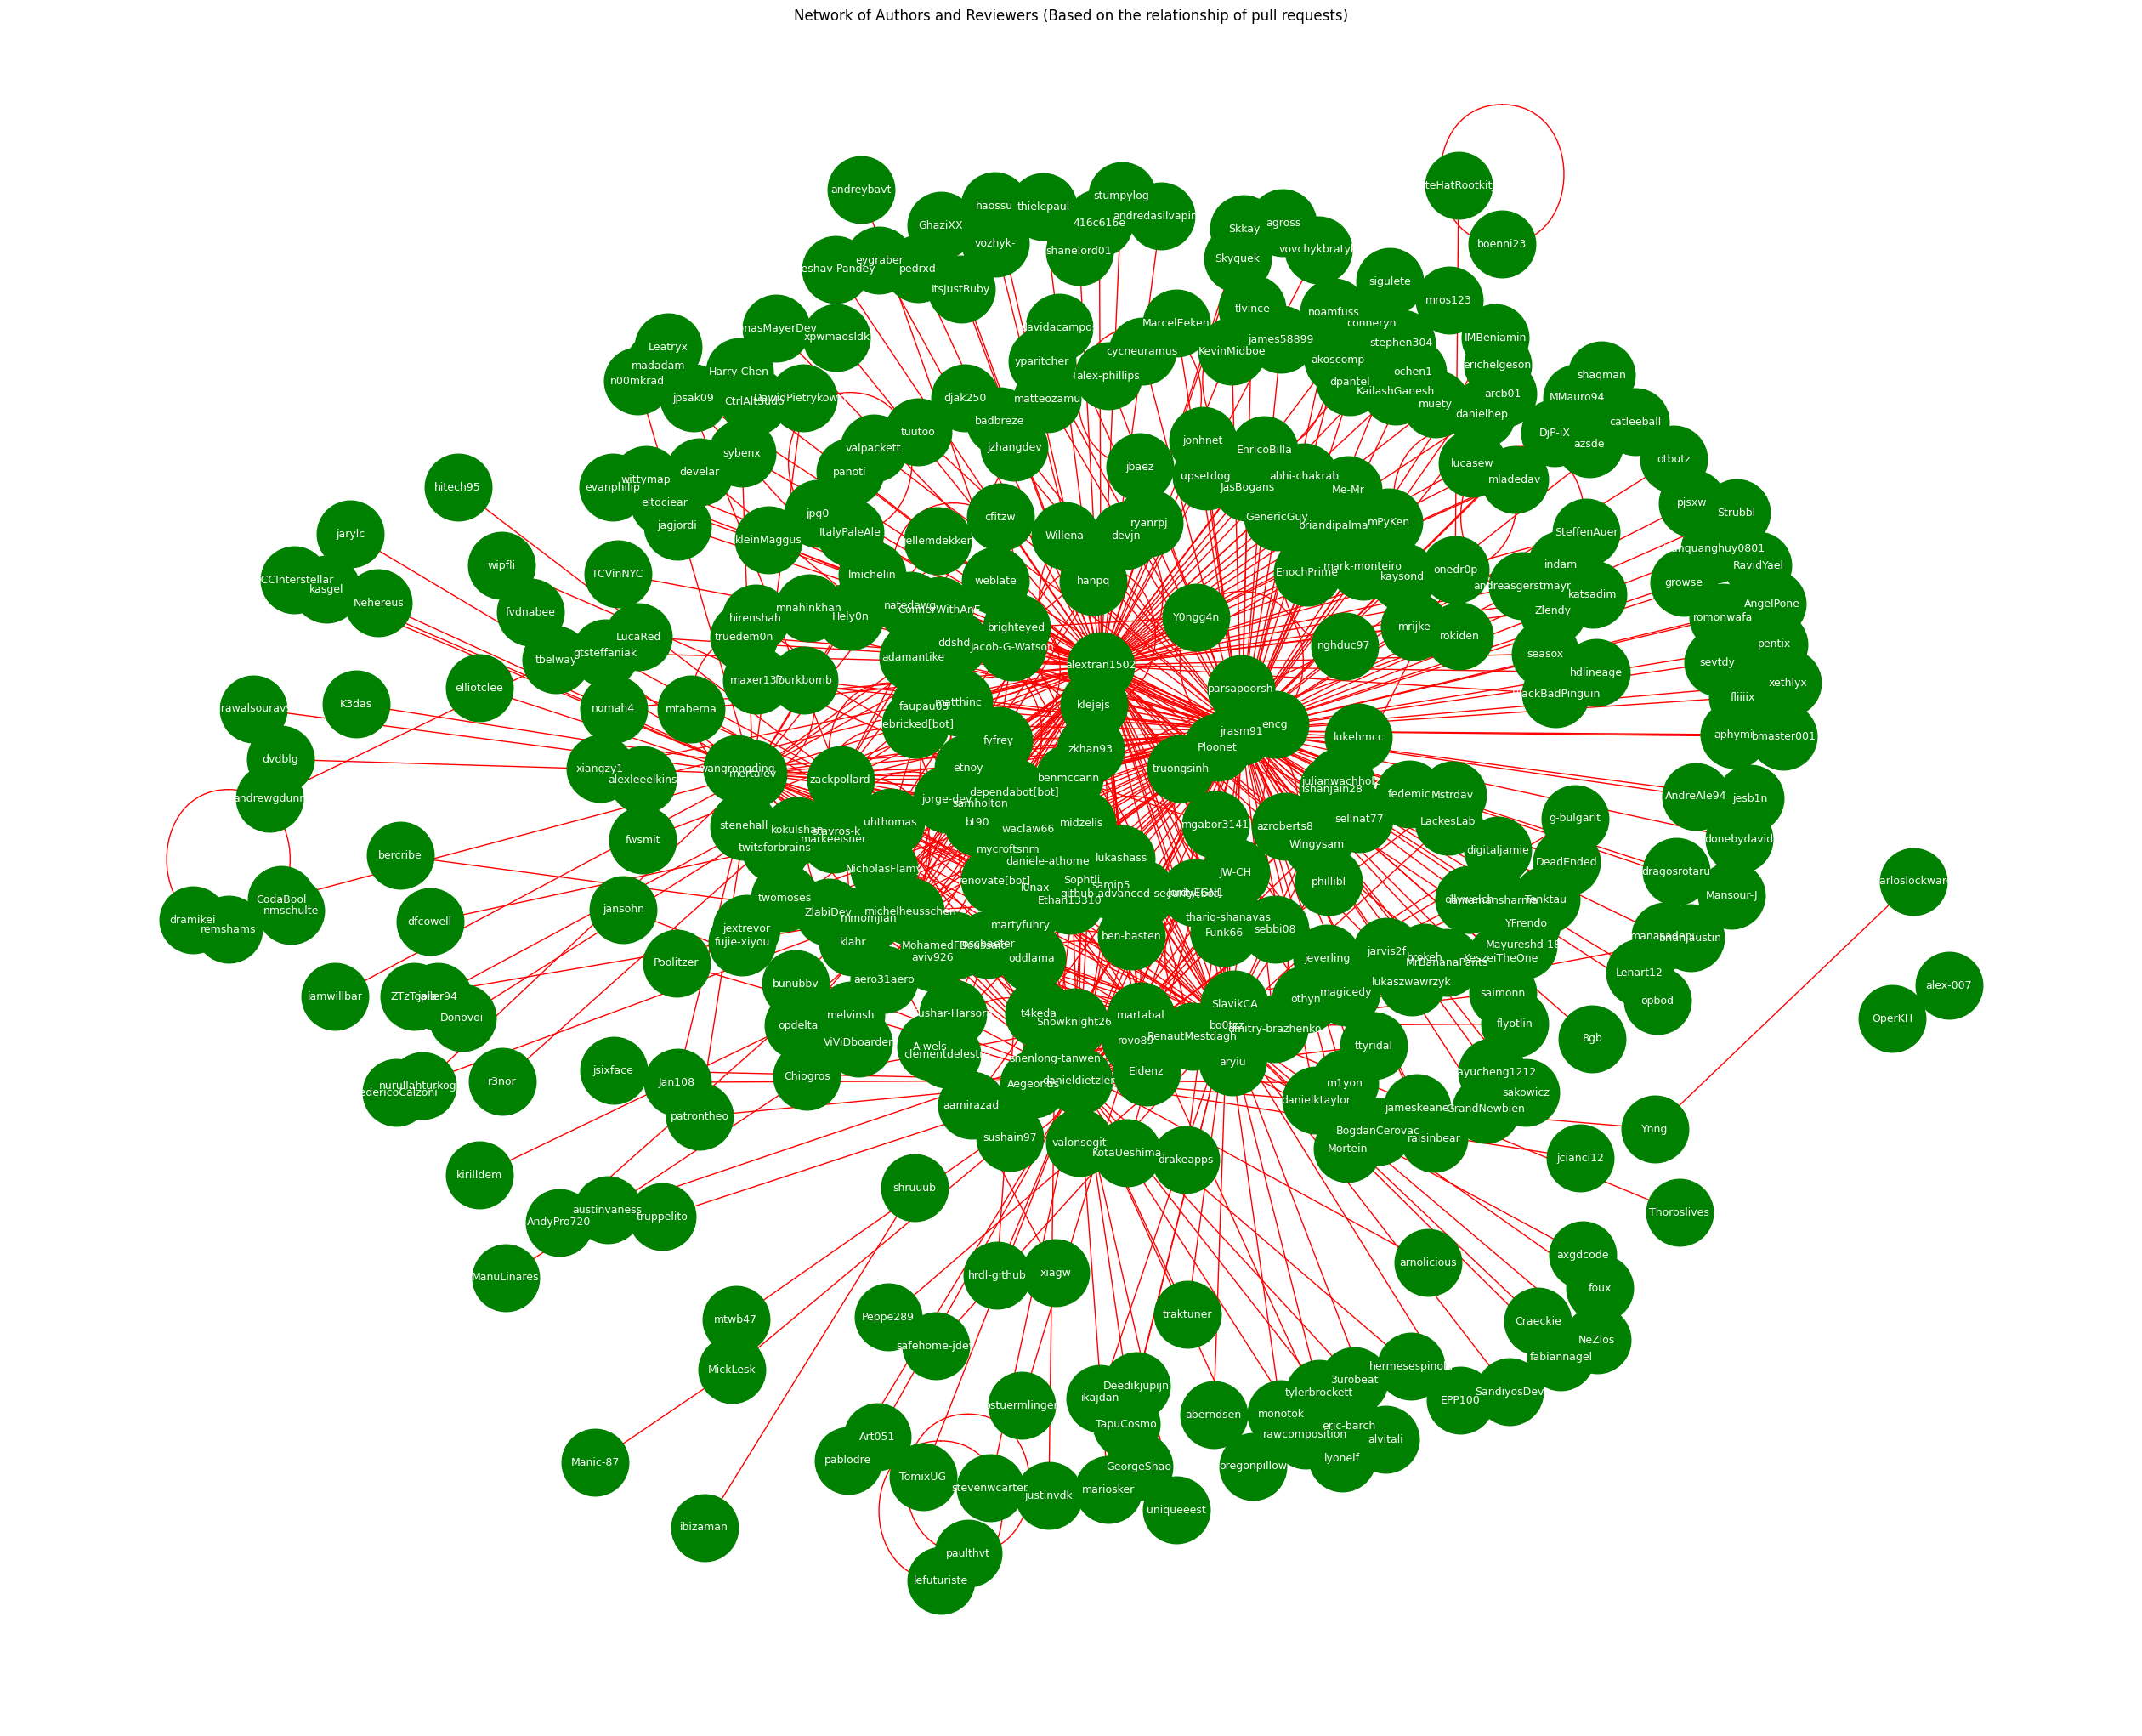

In [40]:
pos = nx.spring_layout(G, k=0.3) 
plt.figure(figsize=(25, 20))  
nx.draw(G, pos, with_labels=True, node_size=3200, font_size=9, font_color='white', node_color='green', edge_color='red')
plt.title('Network of Authors and Reviewers (Based on the relationship of pull requests)')
plt.show()

In [66]:
issue_df = pd.read_csv(os.path.join('issue.csv'))

In [67]:
issue_df

Created_at            Closed_at   State  \
0     2024-06-10 11:58:48                  NaN    open   
1     2024-06-10 10:38:14                  NaN    open   
2     2024-06-10 09:03:16  2024-06-10 09:09:21  closed   
3     2024-06-09 21:48:28                  NaN    open   
4     2024-06-09 19:07:24  2024-06-09 19:18:02  closed   
...                   ...                  ...     ...   
7264  2022-02-06 06:37:29  2022-02-08 06:27:24  closed   
7265  2022-02-06 06:37:24  2022-02-08 03:44:44  closed   
7266  2022-02-06 06:37:08  2022-02-06 06:50:47  closed   
7267  2022-02-06 06:07:43  2022-02-06 06:07:56  closed   
7268  2022-02-05 07:04:44  2022-02-06 06:26:15  closed   

                                  Labels         Assignees  Comment user  
0                                     []                []           NaN  
1     ['dependencies', 'github_actions']                []        MFYDev  
2                                     []                []           NaN  
3                            ['📱mobile']                []           NaN  
4                     ['github_actions']                []           NaN  
...                                  ...               ...           ...  
7264                     ['enhancement']                []  alextran1502  
7265                     ['enhancement']                []           NaN  
7266                                  []                []  alextran1502  
7267                                  []                []   zackpollard  
7268                         ['feature']  ['alextran1502']           NaN  

[7269 rows x 6 columns]

In [58]:
import re
def extract_user(users):
    if users == '[]':
        return ''
    iss = re.search(r'login="([^"]+)"', users)
    return iss.group(1) if iss else ''
issue_df['Comment user'] = issue_df['Comment user'].apply(extract_user)
issue_df

Author  Comment user                 Created_at  \
0       seanmuth                2024-06-14 15:53:39+00:00   
1      Mubelotix      mmomjian  2024-06-14 15:21:48+00:00   
2       bw1faeh0                2024-06-14 14:21:52+00:00   
3        juanjax                2024-06-14 13:12:33+00:00   
4       dagstuan                2024-06-14 12:39:35+00:00   
5      lateplate                2024-06-14 11:49:41+00:00   
6   mluettermann        bo0tzz  2024-06-14 09:16:41+00:00   
7       klendgit     petersuba  2024-06-14 09:12:13+00:00   
8        ykrasik  alextran1502  2024-06-14 07:19:22+00:00   
9      david19au        bo0tzz  2024-06-14 06:45:58+00:00   
10       sebbi08                2024-06-14 06:33:32+00:00   
11       MAFLIXD     chowhi123  2024-06-14 04:23:49+00:00   
12        MFYDev        MFYDev  2024-06-14 02:26:39+00:00   
13      fraddy91      fraddy91  2024-06-14 02:01:39+00:00   
14        derchr  alextran1502  2024-06-13 19:47:31+00:00   
15      grgergo1                2024-06-13 19:41:28+00:00   
16        xlpppp                2024-06-13 16:56:03+00:00   

                    Closed_at   State Labels Assignees  
0   2024-06-14 15:55:07+00:00  closed     []        []  
1   2024-06-14 15:25:11+00:00  closed     []        []  
2                         NaN    open     []        []  
3                         NaN    open     []        []  
4                         NaN    open     []        []  
5                         NaN    open     []        []  
6   2024-06-14 09:57:47+00:00  closed     []        []  
7   2024-06-14 09:58:20+00:00  closed     []        []  
8                         NaN    open     []        []  
9   2024-06-14 09:56:37+00:00  closed     []        []  
10                        NaN    open     []        []  
11  2024-06-14 07:29:40+00:00  closed     []        []  
12  2024-06-14 02:51:53+00:00  closed     []        []  
13  2024-06-14 07:32:33+00:00  closed     []        []  
14                        NaN    open     []        []  
15                        NaN    open     []        []  
16  2024-06-13 16:58:29+00:00  closed     []        []

In [54]:
df_temp.loc[10:30]

Author  Comment user
10   sebbi08              
11   MAFLIXD     chowhi123
12    MFYDev        MFYDev
13  fraddy91      fraddy91
14    derchr  alextran1502
15  grgergo1              
16    xlpppp

Text(0.5, 1.0, 'Network of Authors and Comment user (Based on the relationship of issues)')

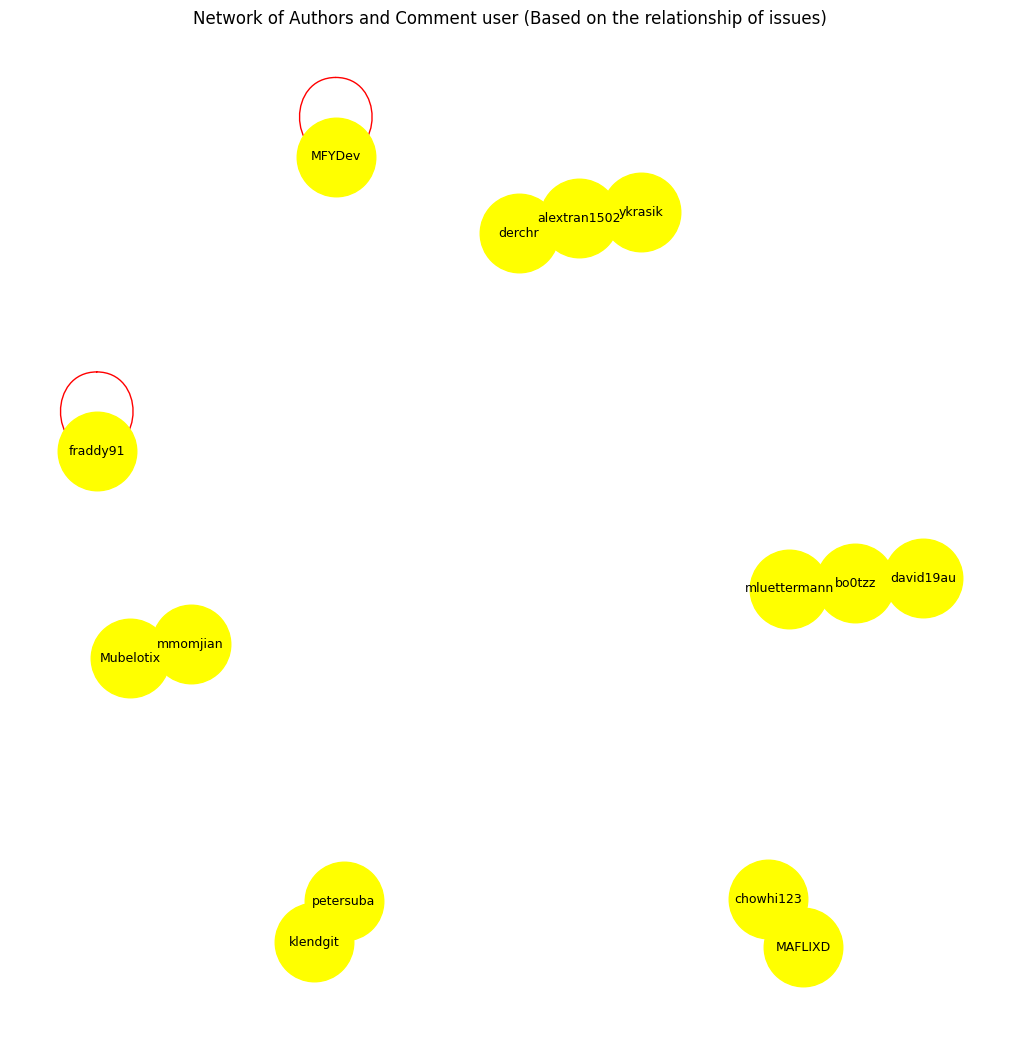

In [56]:
G2 = nx.Graph()
df_temp = pd.DataFrame()
df_temp['Author'] = issue_df['Author'].copy()
df_temp['Comment user'] = issue_df['Comment user'].copy()
for i in range(df_temp.shape[0]-1):
    if df_temp['Comment user'].loc[i] !='':
        G2.add_edge(df_temp['Author'].loc[i], df_temp['Comment user'].loc[i])
pos2 = nx.spring_layout(G2, k=0.3)
plt.figure(figsize = (10, 10))
nx.draw(G2, pos2, with_labels=True, node_size=3200, font_size=9, font_color='black',node_color='yellow',edge_color='red' )
plt.title('Network of Authors and Comment user (Based on the relationship of issues)')